# <font color='blue'>Data Science Academy</font> 

# <font color='blue'>Big Data Real-Time Analytics Com Python e Spark - Versão 3.0</font>


## Projeto com Feedback 3: Análise de Risco no Transporte Público

O conjunto de dados a seguir lista incidentes de trânsito ocorridos na cidade de 
Londres.

Este dataset é público e poder ser encontrado no link: https://data.world/makeovermonday/2018w51

Neste trabalho, será feita a analise dos dados e construídos gráficos que respondam a essas 
10 perguntas abaixo:

1. Qual a quantidade de incidentes por gênero?
2. Qual faixa etária esteve mais envolvida nos incidentes?
3. Qual o percentual de incidentes por tipo de evento (Incident Event Type)?
4. Como foi a evolução de incidentes por mês ao longo do tempo?
5. Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?
6. Qual foi a média de incidentes por mês envolvendo crianças (Child)?
7. Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?
8. No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?
9. Considerando o Operador qual a distribuição de incidentes ao longo do tempo?
10. Qual o tipo de incidente mais comum com ciclistas?


Este trabalho vista fazer a análise exploratória dos dados suficiente para que sejam respondidas estas perguntas. Não será feito tratamento dos dados no sentido de criação de um modelo de predição.

*Obs.: Foi utilizado como sugestão de roteiro deste projeto os roteiros desenvolvidos em aulas.*

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.4


In [2]:
# Imports
import numpy as np
import pandas as pd
import pandasql
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pandasql import sqldf

## Carregando o Dataset

In [3]:
# Carrega os dados
df = pd.read_excel("makeovermonday-2018w51/TFL Bus Safety.xlsx")

In [4]:
df.shape

(23158, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       23158 non-null  int64         
 1   Date Of Incident           23158 non-null  datetime64[ns]
 2   Route                      23158 non-null  object        
 3   Operator                   23158 non-null  object        
 4   Group Name                 23158 non-null  object        
 5   Bus Garage                 23158 non-null  object        
 6   Borough                    23158 non-null  object        
 7   Injury Result Description  23158 non-null  object        
 8   Incident Event Type        23158 non-null  object        
 9   Victim Category            23158 non-null  object        
 10  Victims Sex                23158 non-null  object        
 11  Victims Age                23158 non-null  object        
dtypes: d

In [6]:
df.head(5)

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


In [7]:
df.sample(5)

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
5109,2015,2015-11-01,358,Metrobus,Go-Ahead,Garage Not Available,Bromley,Injuries treated on scene,Onboard Injuries,Passenger,Female,Adult
18008,2017,2017-12-01,94,London United,London United,Shepherds Bush,Hammersmith & Fulham,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Adult
10966,2016,2016-02-01,55,East London,Stagecoach,Garage Not Available,Waltham Forest,Reported Minor Injury - Treated at Hospital,Assault,Bus Driver,Male,Adult
21213,2018,2018-06-01,79,Metroline,Metroline,Perivale,Brent,Injuries treated on scene,Personal Injury,Passenger,Female,Elderly
18158,2017,2017-12-01,253,Arriva London North,Arriva London,Stamford Hill,Hackney,Injuries treated on scene,Slip Trip Fall,Passenger,Male,Unknown


In [8]:
df.tail(5)

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
23153,2018,2018-09-01,(blank),East London,Stagecoach,West Ham,Newham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23154,2018,2018-09-01,(blank),London United,London United,Hounslow,Not specified,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23155,2018,2018-09-01,(blank),London United,London United,Park Royal,Harrow,Injuries treated on scene,Slip Trip Fall,Operational Staff,Male,Adult
23156,2018,2018-09-01,(blank),London United,London United,Shepherds Bush,Hammersmith & Fulham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23157,2018,2018-09-01,(blank),Metroline,Metroline,Holloway,Islington,Injuries treated on scene,Personal Injury,Other,Unknown,Unknown


## EDA - Parte 1

### Separação das Variáveis Categóricas e Numéricas

In [9]:
df.columns

Index(['Year', 'Date Of Incident', 'Route', 'Operator', 'Group Name',
       'Bus Garage', 'Borough', 'Injury Result Description',
       'Incident Event Type', 'Victim Category', 'Victims Sex', 'Victims Age'],
      dtype='object')

In [10]:
df.dtypes

Year                                  int64
Date Of Incident             datetime64[ns]
Route                                object
Operator                             object
Group Name                           object
Bus Garage                           object
Borough                              object
Injury Result Description            object
Incident Event Type                  object
Victim Category                      object
Victims Sex                          object
Victims Age                          object
dtype: object

In [11]:
# Lista de colunas categóricas
cats = ['Year', 'Route', 'Operator', 'Group Name',
       'Bus Garage', 'Borough', 'Injury Result Description',
       'Incident Event Type', 'Victim Category', 'Victims Sex', 'Victims Age']

Observações:

Neste projeto não há variáveis numéricas. Apesar de haverem números na variável `Year`, estes serão tratados como categorias.

A variável `Date Of Incident` serve como referência temporal. Dela poderemos extrair os meses para auxiliar na visualização dos dados.

In [12]:
# Transformando variáveis categórias em tipo 'Category' do Pandas
for col in cats:
    df[col] = df[col].astype('category')

In [13]:
# Convertendo variável Year em string para ser tratada como Category
df.Year = df.Year.astype("str")

Algumas observações:

1. Os incidentes registrados neste dataset terminam em 01/09/2018, portanto é esperado haver número reduzido de incidentes em 2018.

2. Percebe-se um aumento de incidentes registrados ao longo dos anos, com exceção de 2018 como explicado acima.

### Explorando as Variáveis Categóricas

In [14]:
# Resumo das variáveis categóricas
df[cats].describe()

,Year,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
count,23158,23158,23158,23158,23158,23158,23158,23158,23158,23158,23158
unique,4,612,25,14,84,35,4,10,17,3,5
top,2017,OOS,Metroline,Arriva London,Garage Not Available,Westminster,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Adult
freq,6573,321,3457,4945,8572,1571,17336,6981,18828,11847,10754


Algumas observações de variáveis mais relevantes:

* Para a variável `Year` **2017** é a classe dominante.
* Para a variável `Operator` **Metroline** é a classe dominante.
* Para a variável `Injury Result Description`, **Injuries treated on scene** é a classe dominante.
* Para a variável `Incident Event Type`, **Slip Trip Fall** é a classe dominante.
* Para a variável `Victims Category`, **Passenger** é a classe dominante.
* Para a variável `Victims Sex`, **Female** é a classe dominante.
* Para a variável `Victims Age`, **Adult** é a classe dominante.
* Os valores únicos para cada categoria variam bastante, sendo entre **3 e 612 valores únicos**

In [15]:
# Listando o total por categoria de cada variável categórica
for col in cats:
    print(f'''Total de Registros Por Categoria da Variável "{col}"''')
    print('Até os 5 primeiros itens:')
    print(df[col].value_counts().head(5))
    print()

Total de Registros Por Categoria da Variável "Year"
Até os 5 primeiros itens:
Year
2017    6573
2016    6093
2015    5715
2018    4777
Name: count, dtype: int64

Total de Registros Por Categoria da Variável "Route"
Até os 5 primeiros itens:
Route
OOS    321
18     191
55     177
24     165
73     156
Name: count, dtype: int64

Total de Registros Por Categoria da Variável "Operator"
Até os 5 primeiros itens:
Operator
Metroline              3457
Arriva London North    3208
East London            2402
London United          2263
Selkent                1808
Name: count, dtype: int64

Total de Registros Por Categoria da Variável "Group Name"
Até os 5 primeiros itens:
Group Name
Arriva London    4945
Metroline        4690
Go-Ahead         4258
Stagecoach       4192
London United    2469
Name: count, dtype: int64

Total de Registros Por Categoria da Variável "Bus Garage"
Até os 5 primeiros itens:
Bus Garage
Garage Not Available    8572
Plumstead                570
Holloway                 448

### Análise Univariada - Count Plot (Categorical)

Gráficos countplot de algumas colunas.

As outras colunas foram deixadas de fora por possuírem muitas categorias, o que poluiria os gráficos, ou por não terem informação aparentemente relevante (ex.: `Route`, `Operator`, etc).

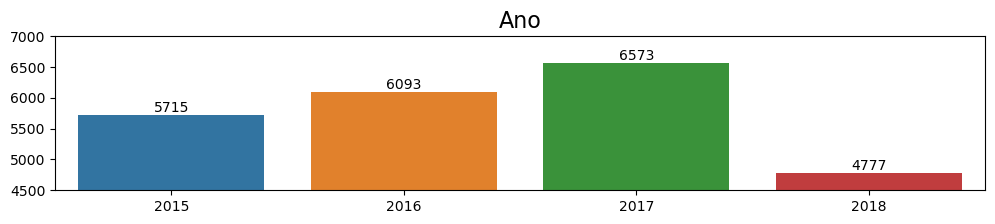

In [16]:
plt.figure(figsize = (12, 2))
ax = sns.countplot(data = df, x = 'Year')
ax.bar_label(ax.containers[0])
plt.title('Ano', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.ylim(4500,7000);

É observado um aumento no número de incidentes registrados ao longo dos anos.

Importante atentar que 2018 não teve registros até o final do ano, portanto é justificável que seu número seja menor.

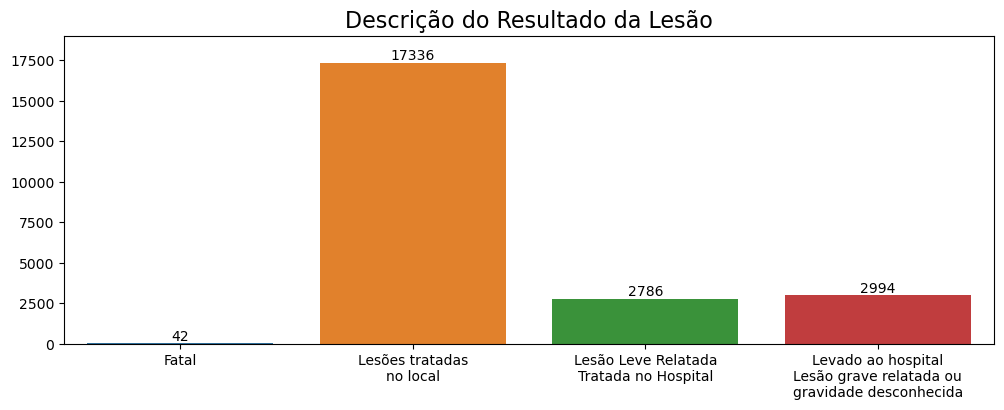

In [17]:
plt.figure(figsize = (12, 4))
ax = sns.countplot(data = df, x = 'Injury Result Description')
ax.bar_label(ax.containers[0])
plt.title('Descrição do Resultado da Lesão', fontsize=16)
plt.xlabel('')
plt.ylabel('')
ax.set_xticklabels(['Fatal', 'Lesões tratadas\nno local', 'Lesão Leve Relatada\nTratada no Hospital', 'Levado ao hospital\nLesão grave relatada ou\ngravidade desconhecida'])
plt.ylim(0, 19000);

Percebe-se que 42 dos incidentes foram fatais no período entre 2015 e 2018.

A maioria dos incidentes foram tratados no local.

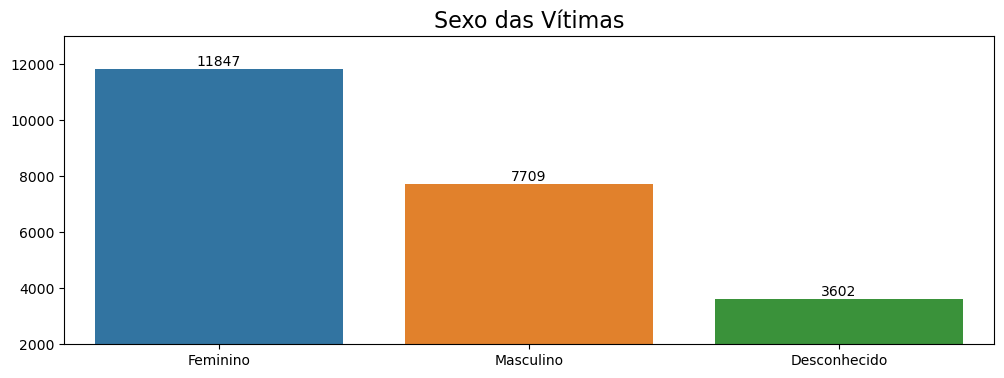

In [18]:
plt.figure(figsize = (12, 4))
ax = sns.countplot(data = df, x = 'Victims Sex')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(['Feminino', 'Masculino', 'Desconhecido'])
plt.title('Sexo das Vítimas', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.ylim(2000, 13000);

O sexo predominante nos incidentes é o **Feminino**.

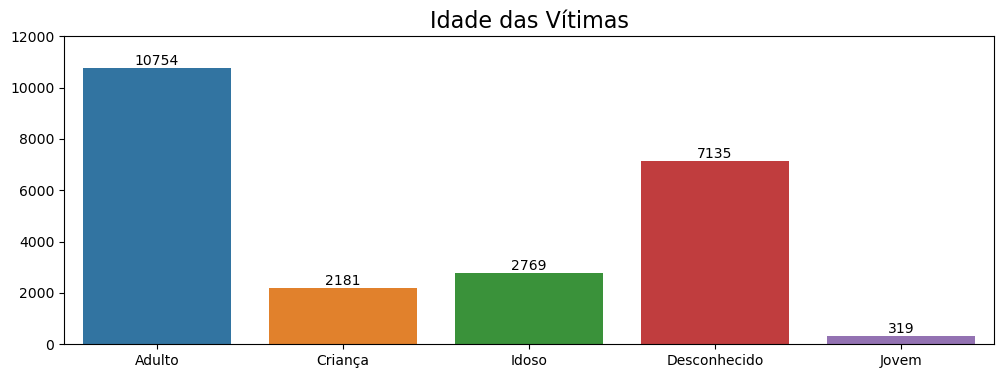

In [19]:
plt.figure(figsize = (12, 4))
ax = sns.countplot(data = df, x = 'Victims Age')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(['Adulto', 'Criança', 'Idoso', 'Desconhecido', 'Jovem'])
plt.title('Idade das Vítimas', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 12000);

A maioria das vítimas é da idade **Adulta**.

Percebe-se um número relevante de registros dados como sexo **Desconhecido**, algo a ser melhorado no processo de registro.

## EDA - Parte 2

### Respondendo às Perguntas Enunciadas

As pesquisas serão feitas através da Linguagem SQL, portanto será usada a biblioteca ``sqldf``.

In [20]:
# Função lambda com sqldf
pysqldf = lambda q: sqldf(q, globals())

### 1. Qual a quantidade de incidentes por gênero?

In [21]:
# Define query e aplica função
query = '''
SELECT "Victims Sex", COUNT(*) as Count
FROM df
GROUP BY "Victims Sex"
ORDER BY Count DESC'''
pysqldf(query)

,Victims Sex,Count
0,Female,11847
1,Male,7709
2,Unknown,3602


De acordo com a query, os números de incidentes por sexo são:
* Feminino: **11.847** incidentes
* Masculino: **7.709** incidentes
* Desconhecido: **3.602** incidentes

### 2. Qual faixa etária esteve mais envolvida nos incidentes?

In [22]:
# Define query e aplica função
query = '''
SELECT "Victims Age", COUNT(*) AS Count
FROM df
GROUP BY "Victims Age"
ORDER BY Count DESC
LIMIT 1'''
pysqldf(query)

,Victims Age,Count
0,Adult,10754


De acordo com a query, a faixa etária mais envolvida em incidentes é:
* Adulto: **10.754** incidentes

Segue restante da lista:

In [23]:
# Define query e aplica função
query = '''
SELECT "Victims Age", COUNT(*) AS Count
FROM df
GROUP BY "Victims Age"
ORDER BY Count DESC'''
pysqldf(query)

,Victims Age,Count
0,Adult,10754
1,Unknown,7135
2,Elderly,2769
3,Child,2181
4,Youth,319


### 3. Qual o percentual de incidentes por tipo de evento (Incident Event Type)?

In [24]:
# Define query e aplica função
query = '''
SELECT "Incident Event Type", COUNT(*) AS Count,
ROUND(CAST(100. * COUNT(*) / SUM(COUNT(*)) OVER () AS DECIMAL(10,2)),2) AS "Total (%)"
FROM df
GROUP BY "Incident Event Type"
ORDER BY "Total (%)" DESC'''
pysqldf(query)

,Incident Event Type,Count,Total (%)
0,Slip Trip Fall,6981,30.15
1,Onboard Injuries,6563,28.34
2,Personal Injury,4596,19.85
3,Collision Incident,4166,17.99
4,Assault,590,2.55
5,Activity Incident Event,114,0.49
6,Vandalism Hooliganism,73,0.32
7,Safety Critical Failure,66,0.28
8,Fire,6,0.03
9,Robbery,3,0.01


### 4. Como foi a evolução de incidentes por mês ao longo do tempo?

In [25]:
# Define query e aplica função
query = '''
SELECT Month || "-" || Year AS Date, COUNT(*) AS Count
FROM (
SELECT Year, STRFTIME("%m", "Date Of Incident") AS Month
FROM df)
GROUP BY Year, Month'''
df1 = pysqldf(query)

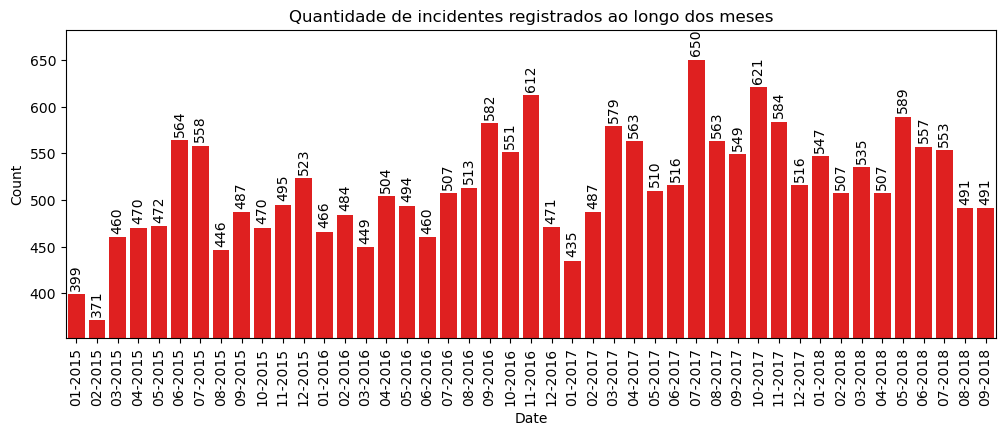

In [26]:
# Plot da tabela df1 gerada
plt.figure(figsize=(12,4))
ax = sns.barplot(data=df1, x='Date', y='Count', color='r')
for i in ax.containers:
    ax.bar_label(i,rotation=90,padding=3)
plt.title('Quantidade de incidentes registrados ao longo dos meses')
plt.ylim(0.95*df1.Count.min(),1.05*df1.Count.max())
plt.xticks(rotation=90);

Segundo esta query, a quantidade de incidentes registrados parece ter um leve aumento pelos meses.

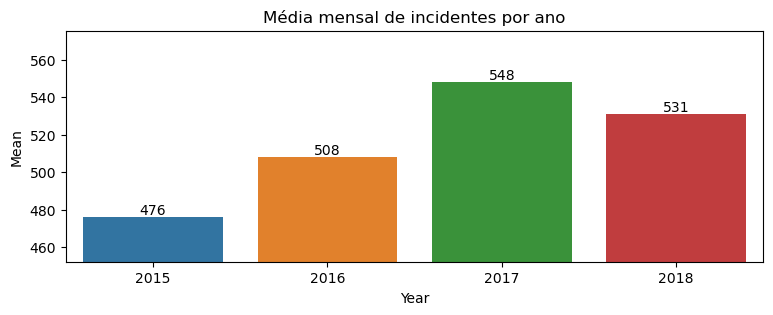

In [27]:
# Define query e aplica função
query = '''
SELECT Year, ROUND(AVG(Count), 0) AS Mean
FROM
(SELECT Month, Year, COUNT(*) AS Count
FROM
(SELECT Year, STRFTIME("%m", "Date Of Incident") AS Month
FROM df)
GROUP BY Year, Month)
GROUP BY Year'''

# Plot da média mensal de incidentes por ano
plt.figure(figsize=(9,3))
ax = sns.barplot(data=pysqldf(query), x='Year', y='Mean')
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim(0.95*pysqldf(query)['Mean'].min(),1.05*pysqldf(query)['Mean'].max())
plt.title('Média mensal de incidentes por ano');

### 5. Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?

In [28]:
# Define query e aplica função
query = '''
SELECT Type, "Victims Sex", Month, Year, MAX("Month Total") AS Total
FROM
(SELECT Type, "Victims Sex", Month, Year, COUNT(Month) AS "Month Total"
FROM
(SELECT "Incident Event Type" AS Type, "Victims Sex", STRFTIME("%m", "Date Of Incident") AS Month, Year
FROM df
WHERE "Incident Event Type"=="Collision Incident"
AND "Victims Sex"=="Female")
GROUP BY Year, Month)'''
pysqldf(query)

,Type,Victims Sex,Month,Year,Total
0,Collision Incident,Female,11,2016,63


De acordo com esta query, o mês com maior número de incidentes do tipo "Collision Incident" envolvendo pessoas do sexo feminino foi **novembro de 2016**, com total de 63 incidentes registrados.

### 6. Qual foi a média de incidentes por mês envolvendo crianças (Child)?

In [29]:
# Define query e aplica função
query = '''
SELECT "Victims Age", ROUND(AVG(Count), 0) AS Mean
FROM
(SELECT "Victims Age", STRFTIME("%m", "Date Of Incident") AS Month, Year, COUNT(*) AS Count
FROM df
WHERE "Victims Age"=="Child"
GROUP BY "Victims Age", Year, Month)'''
pysqldf(query)

,Victims Age,Mean
0,Child,48.0


A média mensal de incidentes envolvendo crianças ao longo de todos os meses do dataset é de aproximadamente 48 incidentes.

In [30]:
# Define query e aplica função
query = '''
SELECT "Victims Age", Year, ROUND(AVG(Count), 0) AS Mean
FROM
(SELECT "Victims Age", STRFTIME("%m", "Date Of Incident") AS Month, Year, COUNT(*) AS Count
FROM df
WHERE "Victims Age"=="Child"
GROUP BY "Victims Age", Year, Month)
GROUP BY "Year"'''
pysqldf(query)

,Victims Age,Year,Mean
0,Child,2015,36.0
1,Child,2016,47.0
2,Child,2017,55.0
3,Child,2018,59.0


A média mensal de incidentes envolvendo crianças ao longo de todos os meses e dividido por ano é de aproximadamente:
* 36 incidentes em **2015**.
* 47 incidentes em **2016**.
* 55 incidentes em **2017**.
* 59 incidentes em **2018**.

Isso mostra um aumento na média mensal de incidentes com crianças ao longo dos anos.

### 7. Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?

In [31]:
# Define query e aplica função
query = '''
SELECT "Victims Sex", "Injury Result Description", COUNT(*) AS Count 
FROM df
WHERE "Injury Result Description"="Injuries treated on scene" AND
("Victims Sex"="Female" OR "Victims Sex"="Male")
GROUP BY "Victims Sex"'''
pysqldf(query)

,Victims Sex,Injury Result Description,Count
0,Female,Injuries treated on scene,8816
1,Male,Injuries treated on scene,5632


In [32]:
# Define query e aplica função
query = '''
SELECT "Victims Sex", "Injury Result Description", COUNT(*) AS Count
FROM df
WHERE "Injury Result Description"="Injuries treated on scene" AND
("Victims Sex"="Female" OR "Victims Sex"="Male")
GROUP BY "Victims Sex"'''
pysqldf(query)

,Victims Sex,Injury Result Description,Count
0,Female,Injuries treated on scene,8816
1,Male,Injuries treated on scene,5632


O número total de incidentes descritas como `Incidentes tratados no local` é:
* 8.816 para pessoas do sexo **Feminino**.
* 5.632 para pessoas do sexo **Masculino**.

### 8. No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?


In [33]:
# Define query e aplica função
query = '''
SELECT Year, Month, MAX(Count) AS "Max Count" FROM
(SELECT "Victims Age", STRFTIME("%m", "Date of Incident") AS Month, Year, COUNT(*) AS Count
FROM df
WHERE "Victims Age"="Elderly" AND Year=2017
GROUP BY Month)
'''
pysqldf(query)

,Year,Month,Max Count
0,2017,07,81


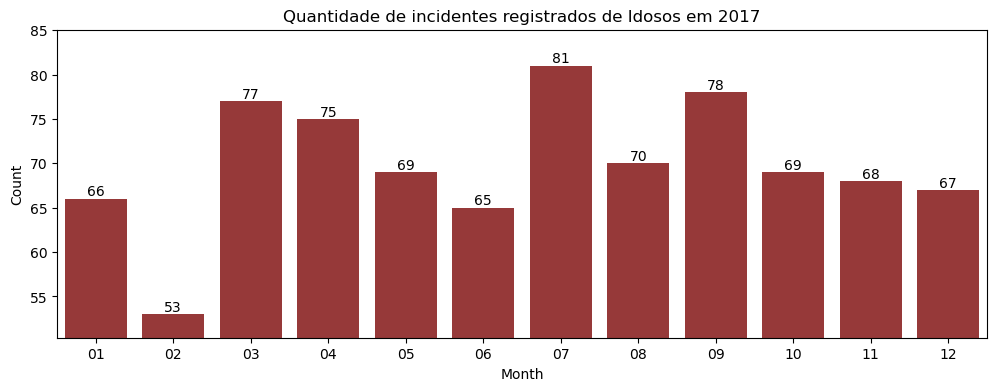

In [34]:
# Define query e aplica função para plot gráfico
query = '''
SELECT "Victims Age", STRFTIME("%m", "Date of Incident") AS Month, Year, COUNT(*) AS Count
FROM df
WHERE "Victims Age"="Elderly" AND Year=2017
GROUP BY Month
'''
df2 = pysqldf(query)

plt.figure(figsize=(12,4))
ax = sns.barplot(data=df2, x='Month', y='Count', color='brown')
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim(0.95*df2.Count.min(), 1.05*df2.Count.max())
plt.title('Quantidade de incidentes registrados de Idosos em 2017');

Portanto, o mês onde houveram mais incidentes com idosos foi o mês 07 (Julho), com total de **81 incidentes**.

### 9. Considerando o Operador qual a distribuição de incidentes ao longo do tempo?


In [35]:
# Automatizando o texto para a query
for i in df.Operator.unique():
    print('COUNT(Operator) FILTER (WHERE Operator = "' + i + '") AS "' + i + '",')

COUNT(Operator) FILTER (WHERE Operator = "London General") AS "London General",
COUNT(Operator) FILTER (WHERE Operator = "Metroline") AS "Metroline",
COUNT(Operator) FILTER (WHERE Operator = "East London") AS "East London",
COUNT(Operator) FILTER (WHERE Operator = "Selkent") AS "Selkent",
COUNT(Operator) FILTER (WHERE Operator = "London United") AS "London United",
COUNT(Operator) FILTER (WHERE Operator = "London Central") AS "London Central",
COUNT(Operator) FILTER (WHERE Operator = "Metroline West") AS "Metroline West",
COUNT(Operator) FILTER (WHERE Operator = "Tower Transit") AS "Tower Transit",
COUNT(Operator) FILTER (WHERE Operator = "Arriva London North") AS "Arriva London North",
COUNT(Operator) FILTER (WHERE Operator = "Abellio London") AS "Abellio London",
COUNT(Operator) FILTER (WHERE Operator = "Metrobus") AS "Metrobus",
COUNT(Operator) FILTER (WHERE Operator = "Arriva London South") AS "Arriva London South",
COUNT(Operator) FILTER (WHERE Operator = "Arriva The Shires") AS "

In [36]:
# Define query e aplica função
query = '''
SELECT
    Date,
    COUNT(Operator) FILTER (WHERE Operator = "London General") AS "London General",
    COUNT(Operator) FILTER (WHERE Operator = "Metroline") AS "Metroline",
    COUNT(Operator) FILTER (WHERE Operator = "East London") AS "East London",
    COUNT(Operator) FILTER (WHERE Operator = "Selkent") AS "Selkent",
    COUNT(Operator) FILTER (WHERE Operator = "London United") AS "London United",
    COUNT(Operator) FILTER (WHERE Operator = "London Central") AS "London Central",
    COUNT(Operator) FILTER (WHERE Operator = "Metroline West") AS "Metroline West",
    COUNT(Operator) FILTER (WHERE Operator = "Tower Transit") AS "Tower Transit",
    COUNT(Operator) FILTER (WHERE Operator = "Arriva London North") AS "Arriva London North",
    COUNT(Operator) FILTER (WHERE Operator = "Abellio London") AS "Abellio London",
    COUNT(Operator) FILTER (WHERE Operator = "Metrobus") AS "Metrobus",
    COUNT(Operator) FILTER (WHERE Operator = "Arriva London South") AS "Arriva London South",
    COUNT(Operator) FILTER (WHERE Operator = "Arriva The Shires") AS "Arriva The Shires",
    COUNT(Operator) FILTER (WHERE Operator = "Arriva Kent Thameside") AS "Arriva Kent Thameside",
    COUNT(Operator) FILTER (WHERE Operator = "Abellio West") AS "Abellio West",
    COUNT(Operator) FILTER (WHERE Operator = "Docklands Buses") AS "Docklands Buses",
    COUNT(Operator) FILTER (WHERE Operator = "Blue Triangle Buses") AS "Blue Triangle Buses",
    COUNT(Operator) FILTER (WHERE Operator = "H R Richmond") AS "H R Richmond",
    COUNT(Operator) FILTER (WHERE Operator = "C T Plus") AS "C T Plus",
    COUNT(Operator) FILTER (WHERE Operator = "London Sovereign") AS "London Sovereign",
    COUNT(Operator) FILTER (WHERE Operator = "TGM GROUP") AS "TGM GROUP",
    COUNT(Operator) FILTER (WHERE Operator = "Sullivan Buses") AS "Sullivan Buses",
    COUNT(Operator) FILTER (WHERE Operator = "Uno Buses") AS "Uno Buses",
    COUNT(Operator) FILTER (WHERE Operator = "Quality Line") AS "Quality Line",
    COUNT(Operator) FILTER (WHERE Operator = "Sullivan Bus & Coach") AS "Sullivan Bus & Coach"
FROM 
(
SELECT Operator, STRFTIME("%m", "Date of Incident") AS Month, Year, STRFTIME("%m", "Date of Incident") || "-" || Year AS Date
FROM df
)
GROUP BY Month, Year
ORDER BY Year, Month
'''
df3 = pysqldf(query)
df3.head()

,Date,London General,Metroline,East London,Selkent,London United,London Central,Metroline West,Tower Transit,Arriva London North,...,Docklands Buses,Blue Triangle Buses,H R Richmond,C T Plus,London Sovereign,TGM GROUP,Sullivan Buses,Uno Buses,Quality Line,Sullivan Bus & Coach
0,01-2015,43,59,4,27,67,22,25,7,57,...,6,2,4,0,0,0,0,0,0,0
1,02-2015,36,74,29,11,53,17,18,8,60,...,1,1,0,2,1,0,0,0,0,0
2,03-2015,27,63,50,0,66,27,21,5,88,...,1,6,10,0,7,0,0,0,0,0
3,04-2015,42,73,78,3,54,30,30,6,53,...,2,2,2,3,1,0,0,0,0,0
4,05-2015,45,62,67,2,60,23,29,14,64,...,2,2,4,0,6,0,0,0,0,0


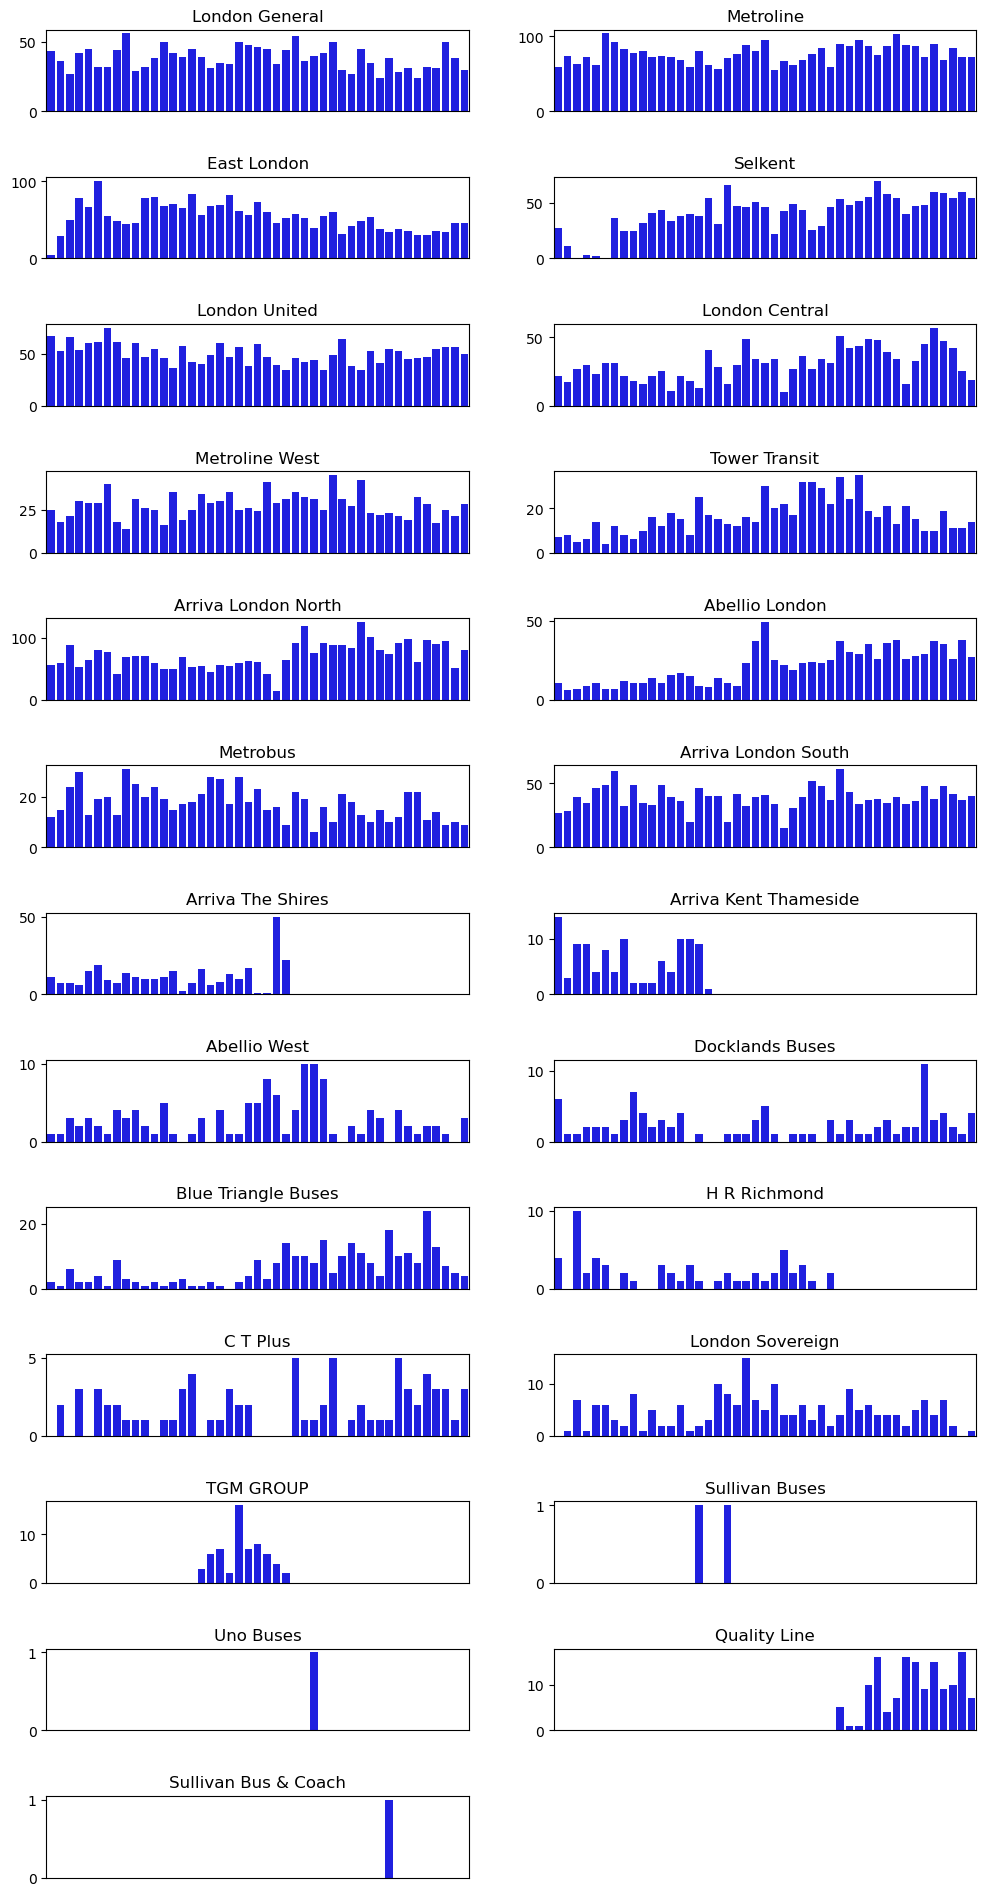

In [37]:
# Plotando o número de incidentes por Operator ao longo do tempo
plt.figure(figsize=(12,24))
for i in range(1, len(df3.columns)):
    plt.subplot(13, 2, i)
    sns.barplot(x=df3['Date'], y = df3[df3.columns[i]], color = 'blue')
    plt.xlabel('')
    plt.ylabel('')
    plt.title(df3.columns[i])
    plt.xticks([]);
    plt.subplots_adjust(hspace=0.8);

Olhando os gráficos percebe-se que algumas operadoras se mantiveram constantes em seus números de incidentes:
* London General, Metroline, London United, Metroline West, Arriva London North, Arriva London South, Dockland Buses.

Outras operadoras tiveram aumento nos números ao longo do tempo:
* Selkent, London Central, Abellio London, Blue Triangle Buses, C T Plus.

Outras operadoras tiveram diminuição no número de incidentes:
* East London, Metrobus.

Outras operadoras tiveram um aumento em determinado período do tempo e logo voltaram ao número anterior:
* Abellio West, Tower Transit, London Sovereign.

Outras operadoras tiveram números registrados somente em uma parte do período do dataset. É provável que deixaram de operar em ou iniciaram as operações a partir de determinada data:
* TGM Group, H R Richmond, Arriva The Shires, Arriva Kent Thameside, Quality Line.


Outras operadoras tiveram somente no máximo 2 incidentes registrados:
* Sullivan Buses, Uno Buses, Sullivan Bus & Coach.

### 10. Qual o tipo de incidente mais comum com ciclistas?


In [38]:
# Define query e aplica função
query = '''
SELECT "Victim Category", COUNT(*) AS Count
FROM df
GROUP BY "Victim Category"
'''
pysqldf(query)

,Victim Category,Count
0,3rd Party driver / Occupant,573
1,Bus Driver,1484
2,Conductor,28
3,Contractor Staff,6
4,Cyclist,275
5,Cyclist,33
6,Insufficient Data,2
7,Member Of Public,127
8,Motorcyclist,102
9,Motorcyclist,4


Existem 2 categorias de "Cyclist". Uma delas com o caracter 'espaço' ao final do texto.

In [39]:
# Define query e aplica função
query = '''
SELECT "Incident Event Type", COUNT(*) AS Count
FROM df
WHERE "Victim Category"="Cyclist" OR "Victim Category"="Cyclist "
GROUP BY "Incident Event Type"
ORDER BY Count DESC
'''
pysqldf(query)

,Incident Event Type,Count
0,Collision Incident,287
1,Personal Injury,9
2,Slip Trip Fall,7
3,Onboard Injuries,4
4,Assault,1


De acordo com a query, o incidente mais comum com ciclistas é do tipo **Collision Incident** (Colisão).

Desta forma, encerra-se o processo de análise exploratória dos dados apresentados, com a resposta a todas as perguntas levantadas para este projeto.

## Fim.